In [1]:
from automorphisms import *
from utils.qec import *
from utils.qiskit import *
from magma_interface import *
import pickle

## [[5,1,3]] - 5 qubit perfect code

#### Define code

In [40]:
n = 15
k = 2 
d = 3

stabs_block1 = ['XZZXIIIIII','IXZZXIIIII','XIXZZIIIII','ZXIXZIIIII']
stabs_block2 = ['IIIIIXZZXI','IIIIIIXZZX','IIIIIXIXZZ','IIIIIZXIXZ']
H_symp = stabs_to_H_symp(stabs_block1 + stabs_block2)

In [41]:
E = qec_embed_code(H_symp, embedding = 'two_code_blocks').embed_mat()
H_symp_embedded = H_symp @ E
print(H_symp_embedded.shape)

(8, 30)


#### Standard form of code

In [46]:
G, LX, LZ, D = compute_standard_form(H_symp_embedded)

#### Automorphism group generators from MAGMA

In [47]:
code_auts_dict = qec_code_auts_from_magma_with_intersection(n,k,d,H_symp_embedded).run(fileroot='./')
filename = f'./auts_n{n}k{k}d{d}.pkl'
with open(filename, 'rb') as f:
    code_auts_dict = pickle.load(f)
print('Aut Group Order: ', code_auts_dict['order'])
print('Time: ', code_auts_dict['time'])
print('No of aut gens: ', len(code_auts_dict['auts']))

Aut Group Order:  120960
Time:  0.04
No of aut gens:  10


#### Physical circuits of automorphism group generators

In [48]:
auts = code_auts_dict['auts']
physical_circuits = []
for num, aut in enumerate(auts):
    phys_act = physical_circ_of_aut(H_symp_embedded,aut)        
    phys_circ = phys_act.circ_w_pauli_correction()
    physical_circuits.append(phys_circ)

#### Logical circuits of automorphism group generators

In [49]:
auts = code_auts_dict['auts']
logical_circuits = []
for num, aut in enumerate(auts):
    logical_act = logical_circ_of_aut(H_symp_embedded,aut)   
    logical_circ = logical_act.circ_w_pauli_correction()
    logical_circuits.append(logical_circ)

In [51]:
print(logical_circuits[])

[('CZ', (1, 2)), ('CZ', (2, 3)), ('CZ', (2, 5)), ('C(X,X)', (2, 6)), ('C(X,X)', (2, 7)), ('CNOT', (7, 4)), ('CNOT', (7, 1)), ('CNOT', (6, 5)), ('CNOT', (6, 4)), ('CNOT', (6, 3)), ('SWAP', (7, 6))]


### Logical gate 1

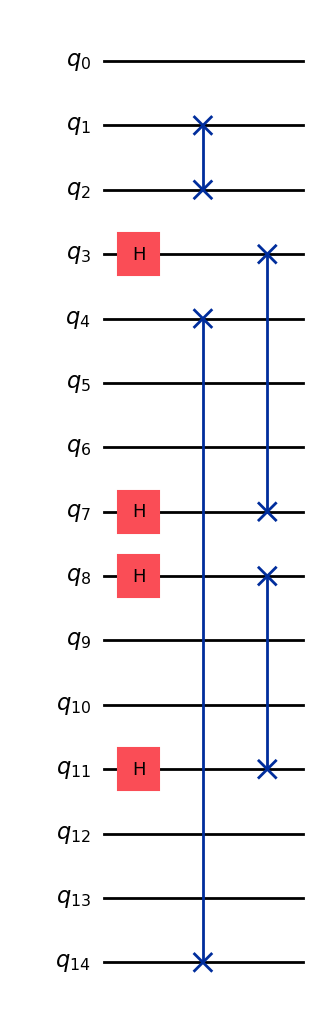

In [16]:
# physical circuit
qc = construct_circuit(physical_circuits[0], n)
qc.draw(output='mpl')

In [17]:
# logical circuit
qc = construct_circuit(logical_circuits[0], k)
qc.draw(output='mpl')

CircuitError: 'Index 3 out of range for size 3.'

### Logical gate 2

In [ ]:
# physical circuit
qc = construct_circuit(physical_circuits[1], n)
qc.draw(output='mpl')

In [ ]:
# logical circuit
qc = construct_circuit(logical_circuits[1], k)
qc.draw(output='mpl')

### Logical gate 3

In [ ]:
# physical circuit
qc = construct_circuit(physical_circuits[2], n)
qc.draw(output='mpl')

In [ ]:
# logical circuit
qc = construct_circuit(logical_circuits[2], k)
qc.draw(output='mpl')

### Logical gate 4

In [ ]:
# physical circuit
qc = construct_circuit(physical_circuits[3], n)
qc.draw(output='mpl')

In [ ]:
# logical circuit
qc = construct_circuit(logical_circuits[3], k)
qc.draw(output='mpl')

### Logical gate 5

In [ ]:
# physical circuit
qc = construct_circuit(physical_circuits[4], n)
qc.draw(output='mpl')

In [ ]:
# physical circuit
qc = construct_circuit(logical_circuits[4], k)
qc.draw(output='mpl')